In [50]:
import pandas
import numpy
from n2lite import n2lite
import matplotlib.pyplot as plt
import matplotlib
import pickle
%matplotlib inline

figsize = (2*3, 2*3)

In [51]:
# beam

beam = ['2lu','2ll','2ru','2rl','3lu','3ll','3ru','3rl','4lu','4ll','4ru','4rl','5lu','5ll','5ru','5rl','1lu','1ll','1ru','1rl']

power_list = []
for i in range(1,17):
    power_list.append('xffts_'+str(i))
Yfac_list = []
for i in range(1,17):
    Yfac_list.append('Yfactor_'+str(i))

In [52]:
path_HOT = './cold_param.db'
path_COLD = './hot_param.db'

In [53]:
# データの呼び出し
D_HOT = n2lite.N2lite(path_HOT)
D_COLD = n2lite.N2lite(path_COLD)

d_HOT = D_HOT.read_pandas_all()
d_COLD = D_COLD.read_pandas_all()

In [54]:
#　データ処理　

d2_HOT_groupby = d_HOT.groupby('loatt_5l')
d2_COLD_groupby = d_COLD.groupby('loatt_5l')
loatt_HOT_mean =d2_HOT_groupby.mean()
loatt_HOT_mean['time'] = loatt_HOT_mean['time'] - loatt_HOT_mean['time'][0]
loatt_COLD_mean =d2_COLD_groupby.mean()
loatt_COLD_mean['time'] = loatt_COLD_mean['time'] - loatt_COLD_mean['time'][0]

In [ ]:
Y = []
Trx = []

for yfac , power in zip(Yfac_list , power_list):
    loatt_HOT_mean[yfac] = loatt_HOT_mean[power]/loatt_COLD_mean[power]
    Y.append(loatt_HOT_mean[yfac])
for i in Y:
    trx = (300-i*77)/(i-1)
    Trx.apend(trx)

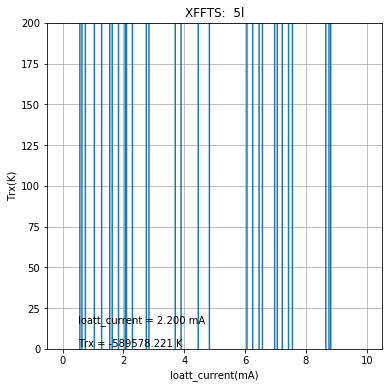

In [55]:
# XFFTS_data_plot
    
ncol = 8
nrow = 2
nax = ncol * nrow

figsize = (ncol * 8, nrow * 8)
    
fig = matplotlib.pyplot.figure(figsize=figsize)
ax = [fig.add_subplot(nrow, ncol, i+1) for i in range(nax)]

for _ax , _trx in zip(ax,Trx)
    _ax.plot(_trx,label = 'Trx')
    _ax.text(0.5,2,'loatt_current = {0:.3f} mA\n\nTrx = {1:.3f} K'.format(_trx.idxmin(), min(_trx)))
    _ax.ylabel('Trx(K)')
    _ax.xlabel('loatt_current(mA)')
    _ax.ylim(0,200)
    _ax.grid()
    _ax.title('XFFTS:  ' +beam[1:17])